In [3]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

tf.config.set_visible_devices([], 'GPU')

#Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

#Chargement des images
observations_entrainement = pnd.read_csv('datas/fichiersLabAnalyse_images/fashion-mnist_train.csv')

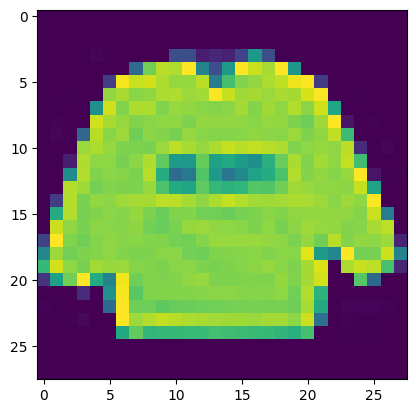

In [4]:
#On exclut la première colonne (les labels) pour constituer un tableau de pixels
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

In [5]:
#On crée des catégories à l'aide du module Keras
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))
#Répartition des données d'entrainement en données d'apprentissage et données de validation
#80% de donnée d'apprentissage et 20% de donnée de validation
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [6]:
# On redimensionne les images au format 28*28 et on réalise un scaling sur les données des pixels
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], 
                                          LARGEUR_IMAGE, 
                                          LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], 
                                    LARGEUR_IMAGE, 
                                    LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [8]:
#Preparation des données de tests
observations_test = pnd.read_csv('datas/fichiersLabAnalyse_images/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], 
                        LARGEUR_IMAGE, 
                        LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# On spécifie les dimensions de l'image d'entrée
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# On crée le réseau de neurones couche par couche
reseauNeurone1Convolution = Sequential()

# Ajout de la couche d'entrée
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

#1- Ajout de la couche de convolution comportant
# 32 filtres de de taille 3x3 (Kernel) parcourant l'image
# Une fonction d'activation de type ReLU (Rectified Linear Activation)
# Une image d'entrée de 28px * 28 px 
reseauNeurone1Convolution.add(Conv2D(32, 
                                     kernel_size=(3, 3), 
                                     activation='relu'))

#2- Définition de la fonction de pooling avec une fenêtre de 2px sur 2 px
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

#3- Ajout d'une fonction d'ignorance
reseauNeurone1Convolution.add(Dropout(0.2))

#5 - On transforme en une seule ligne
reseauNeurone1Convolution.add(Flatten())

#6 - Ajout d'un réseau de neurones composé de 128 neurones avec 
# une fonction d'activation de type ReLU
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

#7 - Ajout d'un réseau de neurones composé de 10 neurones avec une 
# fonction d'activation de type softmax
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

In [10]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

In [11]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10


2025-11-18 04:09:33.606157: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8219 - loss: 0.5255 - val_accuracy: 0.8735 - val_loss: 0.3644
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8792 - loss: 0.3416 - val_accuracy: 0.8838 - val_loss: 0.3264
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8934 - loss: 0.3017 - val_accuracy: 0.8861 - val_loss: 0.3153
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9019 - loss: 0.2779 - val_accuracy: 0.8943 - val_loss: 0.2977
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9102 - loss: 0.2560 - val_accuracy: 0.8998 - val_loss: 0.2779
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9136 - loss: 0.2409 - val_accuracy: 0.9018 - val_loss: 0.2765
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9175 - loss: 0.2286 - val_accuracy: 0.9074 - val_loss: 0.2575
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9229 - loss: 0.2131 - val_accuracy: 0.907

In [12]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.23548784852027893
Précision: 0.9150999784469604


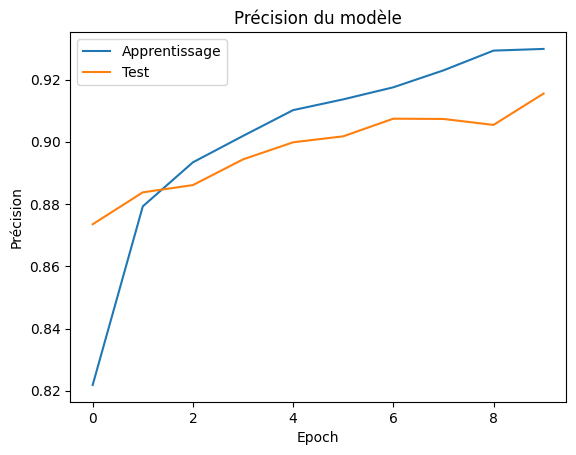

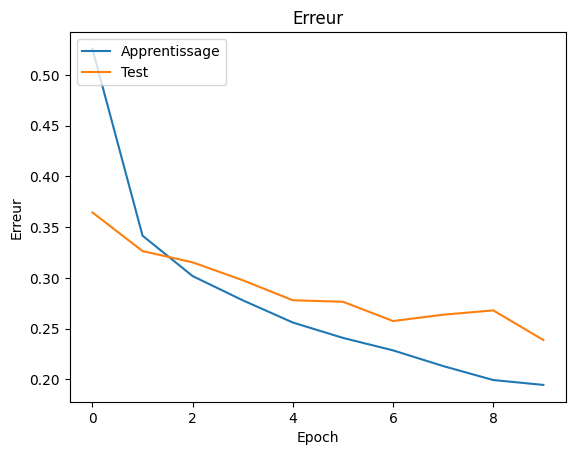

In [13]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

In [16]:
nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)

historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8276 - loss: 0.4612 - val_accuracy: 0.8489 - val_loss: 0.4101
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8750 - loss: 0.3811

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8750 - loss: 0.3811 - val_accuracy: 0.8469 - val_loss: 0.4145
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.8507 - loss: 0.4068 - val_accuracy: 0.8567 - val_loss: 0.3854
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8672 - loss: 0.3108 - val_accuracy: 0.8539 - val_loss: 0.3893
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.8550 - loss: 0.3886 - val_accuracy: 0.8587 - val_loss: 0.3831
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8906 - loss: 0.3467 - val_accuracy: 0.8539 - val_loss: 0.3821
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8601 - loss: 0.3729 - val_accuracy: 0.8651 - val_loss: 0.3617
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8594 - loss: 0.3407 - val_accuracy: 0.8662 - val_loss: 0.3568
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.8675 - loss: 0.3588 - val_accuracy: 0

In [18]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")

Modèle sauvegardé !


In [19]:
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(10, activation='softmax'))

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10


2025-11-18 04:29:11.571534: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 47s 237ms/step - accuracy: 0.7494 - loss: 0.7269 - val_accuracy: 0.1022 - val_loss: 2.7026
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 44s 233ms/step - accuracy: 0.8458 - loss: 0.4269 - val_accuracy: 0.4830 - val_loss: 1.8006
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 231ms/step - accuracy: 0.8740 - loss: 0.3534 - val_accuracy: 0.8122 - val_loss: 0.5258
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 231ms/step - accuracy: 0.8870 - loss: 0.3179 - val_accuracy: 0.8902 - val_loss: 0.3146
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 231ms/step - accuracy: 0.8954 - loss: 0.2954 - val_accuracy: 0.9073 - val_loss: 0.2635
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 231ms/step - accuracy: 0.9026 - loss: 0.2765 - val_accuracy: 0.9022 - val_loss: 0.2686
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 239ms/step - accuracy: 0.9069 - loss: 0.2616 - val_accuracy: 0.9127 - val_loss: 0.2519
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 242ms/step - accuracy: 0.9108 - loss: 0.2508 - val

In [21]:
evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.22694262862205505
Précision: 0.9189000129699707
